### 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Load product demand dataset

Data columns:
- `trend-index`: company's internal demand indicator calculated from the combination of Google Analytics and internal data
- `sales`: actual sales for one item in all US stores

Date range:
- Historical data has date range from 2015-01-01 to 2020-04-29

In [2]:
data = pd.read_csv('product-demand-2015-2020-a.csv')

In [3]:
data

,date,trend-index,sales
0,2015-01-01,25.72,15.00
1,2015-01-02,24.56,22.50
2,2015-01-03,25.16,29.25
3,2015-01-04,23.44,30.75
4,2015-01-05,29.16,32.75
...,...,...,...
1941,2020-04-25,200.61,410.20
1942,2020-04-26,194.13,410.20
1943,2020-04-27,192.87,411.20
1944,2020-04-28,213.39,413.20


In [4]:
data.shape

(1946, 3)

#### Slice data for 2015-2019 (pre-COVID preiod) 

In [5]:
df = data.loc[0:1825]
df = df.reset_index(drop=True)

In [6]:
df

,date,trend-index,sales
0,2015-01-01,25.72,15.00
1,2015-01-02,24.56,22.50
2,2015-01-03,25.16,29.25
3,2015-01-04,23.44,30.75
4,2015-01-05,29.16,32.75
...,...,...,...
1821,2019-12-27,34.84,41.25
1822,2019-12-28,34.28,46.50
1823,2019-12-29,29.16,49.00
1824,2019-12-30,35.44,38.00


#### Slice data for 2020 Jan-April (COVID period)

In [7]:
df_covid = data.loc[1825:]
df_covid = df_covid.reset_index(drop=True)

In [8]:
df_covid

,date,trend-index,sales
0,2019-12-31,28.56,53.0
1,2020-01-01,32.00,142.0
2,2020-01-02,37.72,137.0
3,2020-01-03,32.56,136.0
4,2020-01-04,24.56,152.0
...,...,...,...
116,2020-04-25,200.61,410.2
117,2020-04-26,194.13,410.2
118,2020-04-27,192.87,411.2
119,2020-04-28,213.39,413.2


#### Visualization- pre COVID historical sales trend
Findings:
- seasonal patterns
- slight increased sales year after year

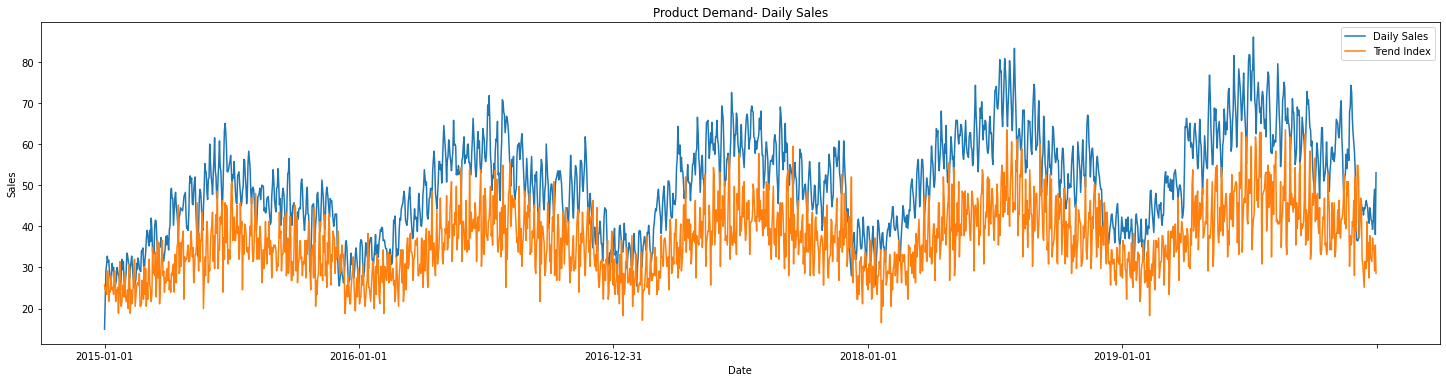

In [9]:
locator = mdates.YearLocator()

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.plot(df['date'], df['sales'], label='Daily Sales')
plt.plot(df['date'], df['trend-index'], label='Trend Index')
plt.tight_layout()
plt.title('Product Demand- Daily Sales')
plt.xlabel('Date')
plt.ylabel("Sales")
plt.legend()
plt.show()

#### Visualization- ALL historical sales
Findings:
- In early 2020 (COVID period), product demand/ sales jumped significantly 

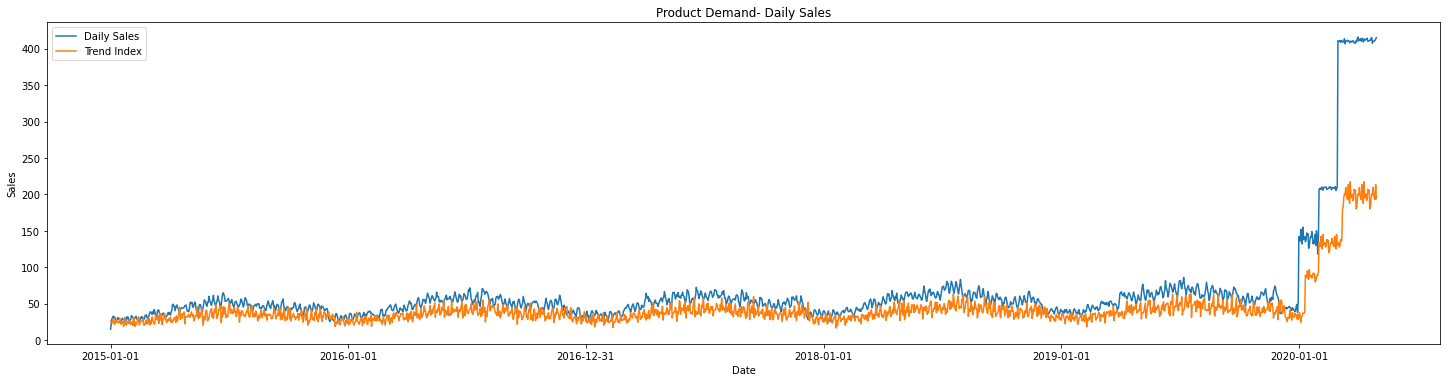

In [10]:
locator = mdates.YearLocator()

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.plot(data['date'], data['sales'], label='Daily Sales')
plt.plot(data['date'], data['trend-index'], label='Trend Index')
plt.tight_layout()
plt.title('Product Demand- Daily Sales')
plt.xlabel('Date')
plt.ylabel("Sales")
plt.legend()
plt.show()

#### Visualization- COVID sales change
Findings:
- In Jan 2020, trend index feature still has correlation with sales, but the data shifts --> potential `data drift`
- In Feb- April, trend index feature seems not relevant to sales anymore --> potential `concept drift`

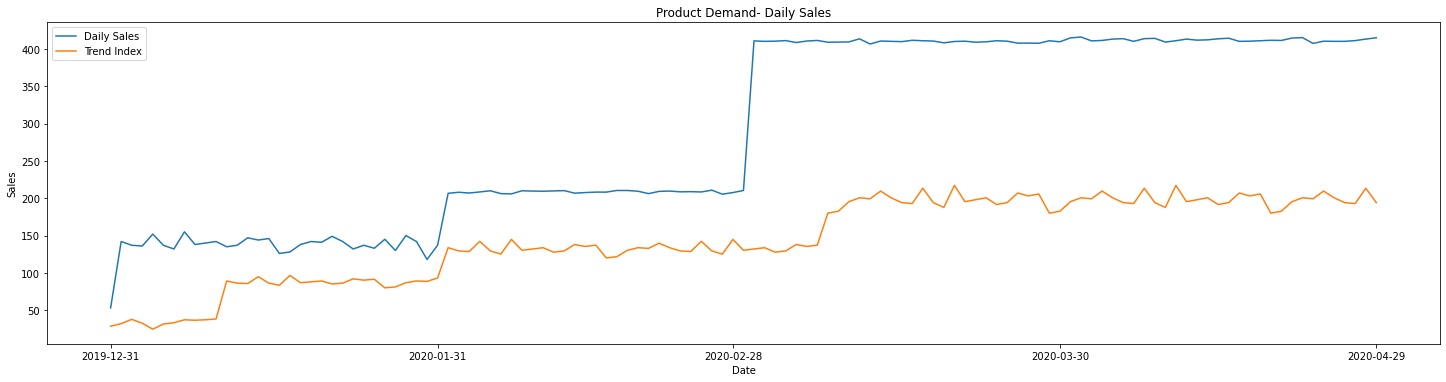

In [11]:
locator = mdates.MonthLocator()

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.plot(df_covid['date'], df_covid['sales'], label='Daily Sales')
plt.plot(df_covid['date'], df_covid['trend-index'], label='Trend Index')
plt.tight_layout()
plt.title('Product Demand- Daily Sales')
plt.xlabel('Date')
plt.ylabel("Sales")
plt.legend()
plt.show()